In [1]:
import pandas as pd
import numpy as np
import numpy as np
import scipy.stats as stat
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly.subplots import make_subplots 
init_notebook_mode(connected=True)

<pre>
옵션의 본질적 가치가 0인 경우를 ATM(at-the money, 손익분기가격)이라 하고
본질적 가치가 (-)인 경우를 OTM(out-of-the-money, 손실이 있는 가격)이라 하며 
본질적 가치가(+)인 경우를 ITM(in-the-money, 이익이 있는 가격)이라고 하며
이들은 보증금적립시 주로 사용된다.

가. Call의 경우
콜의 경우에는 만기의 시장가격이 행사가격보다 작으면 손실이 발생하며 OTM이 되고
시장가격이 행사가격보다 크면 이익이 발생하여 ITM이 되고 시장가격이 행사가격과
같으면 본질적 가치가 (0)이 된다.


나. Put의 경우
Put의 경우에는 만기의 시장가격이 행사가격보다 크면 본질적 가치가 (-)가 되어 OTM,
만기의 가격이 행사가격보다 작으면 본질적 가치가 (+)가 되어 ITM이 되며,
가격이 행사가격과 같으면 본질적 가치가 (0)이 되어 ATM이 된다.

--------------------------------------------------------
**해설
시간가치가 존재하는 이유
옵션수수료에서 시간가치가 존재하는 이유는 무엇인가? 지금 옵션을 매입하는 경우 만기가 만료될 때까지의 사이에 가격의 변동으로 현재에 예측되는 이익보다 더 많은 이익을 얻을 수 있는 기회가 있기 때문. 선물이나 옵션은 헤지를 목적으로 하는 것이므로 거래자가 헤지를 하면 그 가격으로 고정되는 것이다. 따라서 어느 일방은 유리하고 불리하고가 없는 것이다. 옵션의 경우에는 선물과 달리 가격예측이 잘못되면 옵션을 포기하여 더 이상의 손실을 피할 수 없으나 이 때 상대방은 옵션 수수료를 취득하므로 무한대의 손실을 커버할 수 있는 것이다. 옵션을 매입하여 그 가치가 항상 일정하다면 수수료로서 본질적 가치만을 지급하면 되는 것이나 옵션만기까지의 기간에 옵션가격이 변동하여 옵션 매입자가 이익을 얻을 수 있으므로, 그 이익에 상당하는 것을 매도자에게 지급하여야 양당사자에게 공평한 것이므로 본질적 가치외의 시간가치가 존재하는 것이다.

In [5]:
# # -------------------------------------------------------------------------------------------
# maturity_s = 0.000001                                     # 잔존만기S
# maturity_e = 1                                            # 잔존만기E
# asset_s = 0.000001                                        # 기초자산가격S
# asset_e = 200                                             # 기초자산가격E

# axis_lim = 100                                            # 차트 축간격
# random_T = np.linspace(maturity_s, maturity_e, axis_lim)  
# random_S = np.linspace(asset_s   , asset_e   , axis_lim) 
# T, S = np.meshgrid(random_T, random_S)                    # X축데이터(잔존만기) , Y축데이터(기초자산가격)  ==현물가격==underlying asset price)
# K = 100                                                   #                     Z축데이터(행사가격)      ==상품가격==옵션가격==strike price)
# # --------------------------------------------------------------------------------------------
# r = 0.01                                                 # 무위험이자율(risk-free rate)
# sigma = 0.25                                             # 변동성(volatility)
# # -------------------------------------------------------------------------------------------

In [2]:
df = pd.read_csv('./data/S&P 500 Futures Historical Data.csv')

In [3]:
df['Date']

0     10/05/2022
1     10/04/2022
2     10/03/2022
3     09/30/2022
4     09/29/2022
5     09/28/2022
6     09/27/2022
7     09/26/2022
8     09/23/2022
9     09/22/2022
10    09/21/2022
11    09/20/2022
12    09/19/2022
13    09/16/2022
14    09/15/2022
15    09/14/2022
16    09/13/2022
17    09/12/2022
18    09/09/2022
19    09/08/2022
20    09/07/2022
21    09/06/2022
22    09/05/2022
23    09/04/2022
24    09/02/2022
25    09/01/2022
26    08/31/2022
27    08/30/2022
28    08/29/2022
29    08/26/2022
30    08/25/2022
31    08/24/2022
32    08/23/2022
33    08/22/2022
34    08/19/2022
35    08/18/2022
36    08/17/2022
37    08/16/2022
38    08/15/2022
39    08/12/2022
40    08/11/2022
41    08/10/2022
42    08/09/2022
43    08/08/2022
44    08/05/2022
Name: Date, dtype: object

In [4]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,10/05/2022,"3,768.75","3,796.00","3,796.00","3,766.25",153.74K,-0.91%
1,10/04/2022,"3,803.25","3,696.50","3,808.75","3,686.25",17.48K,3.06%
2,10/03/2022,"3,690.25","3,593.25","3,711.75","3,571.75",2.32M,2.46%
3,09/30/2022,"3,601.50","3,656.50","3,693.75","3,595.25",2.98M,-1.44%
4,09/29/2022,"3,654.25","3,730.25","3,736.00","3,622.00",2.86M,-2.08%
5,09/28/2022,"3,732.00","3,668.50","3,751.25","3,613.00",2.78M,1.94%
6,09/27/2022,"3,661.00","3,668.00","3,733.00","3,635.25",2.96M,-0.25%
7,09/26/2022,"3,670.00","3,705.25","3,730.50","3,657.50",2.90M,-1.05%
8,09/23/2022,"3,709.00","3,777.25","3,783.25","3,660.25",2.91M,-1.67%
9,09/22/2022,"3,772.00","3,794.00","3,833.00","3,763.50",2.58M,-0.90%


In [5]:
# r = 0.01                                                 # 무위험이자율(risk-free rate)
# sigma = 0.25   
#K =  int(df['Price'].values[-1])# 계약 시점에 미리 지정하는 가격


df['Price'].replace(',','',regex=True, inplace=True)
df['Change %'].replace('%','',regex=True, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df['Price'] = df['Price'].astype(float)
df['Change %'] = df['Change %'].astype(float) 

df2 = df[['Date', 'Price', 'Change %']]
df2['잔존만기'] = df2['Date'].apply(lambda x :np.busday_count(str(x)[0:10], '2022-11-05')/252) # 
# df2['잔존만기'] = df2['잔존만기'].apply(lambda x: np.float(x))
df2



C:\Users\ASIA\AppData\Local\Temp\ipykernel_29228\4010806369.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Price,Change %,잔존만기
0,2022-10-05,3768.75,-0.91,0.091270
1,2022-10-04,3803.25,3.06,0.095238
2,2022-10-03,3690.25,2.46,0.099206
3,2022-09-30,3601.50,-1.44,0.103175
4,2022-09-29,3654.25,-2.08,0.107143
5,2022-09-28,3732.00,1.94,0.111111
6,2022-09-27,3661.00,-0.25,0.115079
7,2022-09-26,3670.00,-1.05,0.119048
8,2022-09-23,3709.00,-1.67,0.123016
9,2022-09-22,3772.00,-0.90,0.126984


In [18]:
maturity_s = 0.000001                                     # 잔존만기S
maturity_e = 1                                            # 잔존만기E
asset_s = 3000                                        # 기초자산가격S
asset_e = 5000  


my_T = df2['잔존만기']
my_S = df2['Price']

T, S = np.meshgrid(my_T, my_S)                    # X축데이터(잔존만기) , Y축데이터(기초자산가격)  ==현물가격==underlying asset price)
K = df2['Price'].values[-1]                                                   #                     Z축데이터(행사가격)      ==상품가격==옵션가격==strike price)
# --------------------------------------------------------------------------------------------
r = 0.01                                                 # 무위험이자율(risk-free rate)
sigma = 0.03                                             # 변동성(volatility)
# -------------------------------------------------------------------------------------------

In [19]:
# x축 : 잔존만기, y축 : , z축: 
contour_lim = 50                              # 차트 라인간격
def my_3d(call, put ,x=T, y=S, LABEL="Greeks" ):
    trace_c = go.Surface(x=T, y=S, z=call, colorscale='Jet', opacity=0.8,
                       contours_x=dict(show=True, color="black", start=maturity_s, end=maturity_e, size=(maturity_e - maturity_s)/contour_lim, project_x=True),
                       contours_y=dict(show=True, color="black", start=asset_s, end=asset_e, size=(asset_e - asset_s)/contour_lim, project_y=True)
                        , colorbar_x=-0.07    # ,showscale=False   
                      )

    trace_p = go.Surface(x=T, y=S, z=put, colorscale='Jet', opacity=0.8,
                       contours_x=dict(show=True, color="black", start=maturity_s, end=maturity_e, size=(maturity_e - maturity_s)/contour_lim, project_x=True),
                       contours_y=dict(show=True, color="black", start=asset_s, end=asset_e, size=(asset_e - asset_s)/contour_lim, project_y=True)
                      )

    fig = make_subplots(rows=1, cols=2,specs=[ [{'type': 'surface'}, {'type': 'surface'}]] ,subplot_titles=(f"{LABEL} call", f"{LABEL} put") )
    fig.add_trace(trace_c, row=1, col=1)
    fig.add_trace(trace_p, row=1, col=2)
    fig.update_layout(width=1000, height=500,
                     scene={ 'xaxis':{'title':'x: Maturity<br><--시작 | 만기 -->'}, 'yaxis':{'title':'y: Spot Price<br><--OTM | ITM -->'}, 'zaxis':{'title':f"z: {LABEL}"} },
                     scene2={'xaxis':{'title':'x: Maturity<br><--시작 | 만기 -->'}, 'yaxis':{'title':'y: Spot Price<br><--ITM | OTM -->'}, 'zaxis':{'title':f"z: {LABEL}"} }
                     # , title_text=f"Option {LABEL}" 
                     )
    # fig.show()
    iplot(fig)


# 델타(Delta, Δ) : 포지션 민감도
* 기초자산 가격(Underlying Asset Price)의 변화에 따른 포지션 민감도(행사가의 변화량)
- 기초자산가 변동 대비 옵션가가 얼마나 바뀌는지 보겠다.

In [20]:
def delta(option_type, S, K, r, T, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * (sigma ** 2)) * T) / (sigma * np.sqrt(T))
    # s는 시장가, k는 행사가, log씌운 이유는
    if option_type == "call":
        return stat.norm.cdf(d1)
    else:
        return stat.norm.cdf(d1) - 1 # -1한 이유는
    
call_delta = delta("call", S, K, r, T, sigma)   # calculate call option delta
put_delta  = delta("put" , S, K, r, T, sigma)   # calculate put option delta

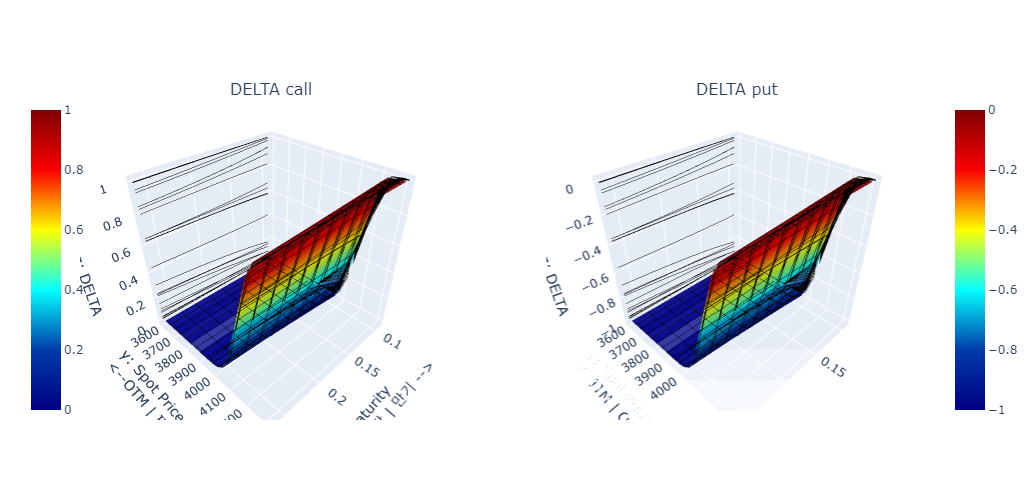

In [21]:
my_3d(call=call_delta, put=put_delta, LABEL = "DELTA" )

# 세타(Theta, Θ) : 시간민감도
* 시간 가치 감소(Time Decay)
* 시간 민감도 지표

In [22]:
def theta(option_type, S, K, r, T, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * (sigma ** 2)) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * T ** 0.5
    
    if option_type == "call":
        return (-sigma * S * stat.norm.pdf(d1))  / (2 * np.sqrt(T)) - 1 * (r * K * np.exp(-r * T) * stat.norm.cdf(1 * d2))
    else:
        return (-sigma * S * stat.norm.pdf(d1))  / (2 * np.sqrt(T)) - (-1) * (r * K * np.exp(-r * T) * stat.norm.cdf(-1 * d2))


call_theta = theta("call", S, K, r, T, sigma)    # calculate call option theta
put_theta  = theta("put" , S, K, r, T, sigma)    # calculate put option theta

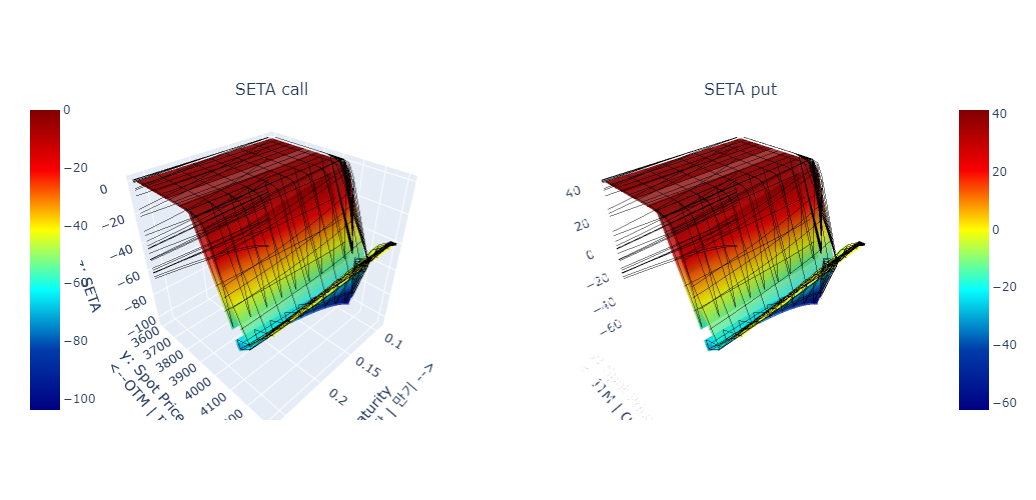

In [23]:
my_3d(call=call_theta, put=put_theta, LABEL = "SETA" )

<pre>
<b> 옵션을 매수했다면 기본적으로 시간과는 적이다 --> 감마로 완충 !!</b>

* 콜/풋 옵션 모두 시간이 지날수록 시간가치가 줄어든다 --> 같은 성질 
* 롱포지션 : 음(-)의 세타값 --> 시간이 흐름에 따라 가치 감소 
* 숏포지션 : 양(+)의 세타값 --> 시간이 흐름에 따라 가치 증가

* 등가격 상태 : 만기에 가까이 갈수록 시간가치가 없어 세타값이 급격히 작아진다
               시간에 대한 민감도는 등가격일때 가장 크다
* 외가격 상태 : 콜/풋 모두 음(-)의 세타값, 영향은 크지 않다
* 내가격 상태 : 콜  음(-)의 세타값
              <font color=red>: 풋  양(+)의 세타값</font>  --> 시간이 빨리 지나야 ITM 상태(내재가치 획득)로 만기


# 감마(Gamma, Γ) : 델타 민감도

* 기초자산 가격과 옵션가는 비선형성(Non-linearity, Convexity) --> 미분 값인 델타만으로는 포지션의 변화를 완벽하게 설명할 수 없다
* 볼록성이 커지면 괴리도 커진다 
* <font color=red>기초자산의 가격 변화에 대한 델타의 민감도 --> 볼록성 측정 지표
* <font color=red>기초자산 가격이 조금만 변해도 델타 값이 크게 바뀌며, 자주 포지션을 변경해야 한다 </font>

In [24]:
def gamma(option_type, S, K, r, T, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * (sigma ** 2)) * T) / (sigma * np.sqrt(T))
    return stat.norm.pdf(d1) / (sigma * S * np.sqrt(T))

call_gamma = gamma("call", S, K, r, T, sigma)    # calculate call option gamma
put_gamma  = gamma("put" , S, K, r, T, sigma)    # calculate put option gamma

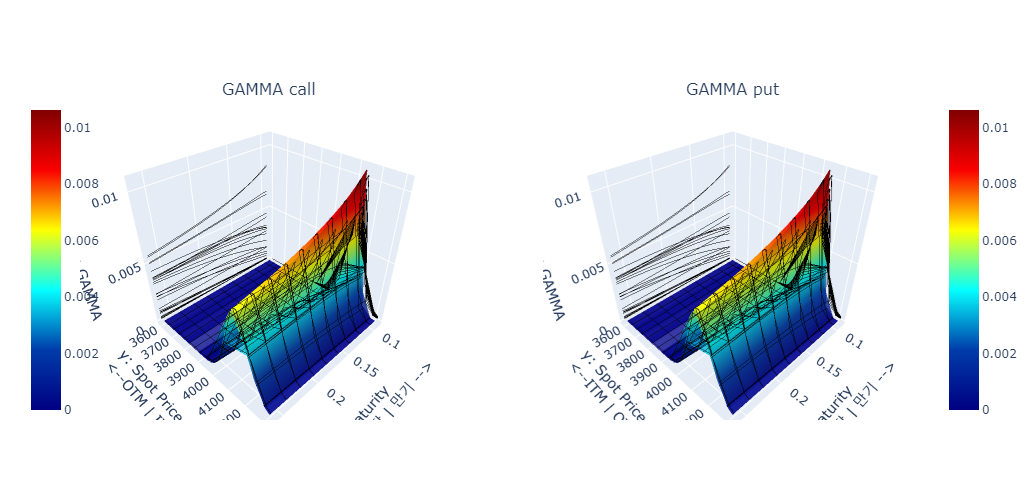

In [25]:
my_3d(call=call_gamma, put=put_gamma, LABEL = "GAMMA" )

<pre>
<font color=red><b>
  롱포지션(매수) : 롱 감마(Long Gamma) , 숏 세타(Short Theta) -->   감마(+), 세타(-) --> 기초자산 변동성이 큰 장세에서 수익 창출
  숏포지션(매도) : 숏 감마(Short Gamma), 롱 세타(Long Theta)  -->   감마(-), 세타(+) --> 기초자산 변동성이 큰 장세에서 수익 창출
  세타와 정반대
</b></font>    
* 등가격 상태 : 감마값(볼록성)이 가장 크다, 만기 시점으로 갈수록 점점 커지다 만기 직전에 크게 증가한다 
              <font color=red>기초자산의 가격 변화에 따른 포지션의 위험이 매우 크다</font>
              
* 변동성이 큰장 : 롱포지션 수익 창출 ,   숏포지션 손실 가능성 커짐
* 횡보장       :                        숏포지션 손실 가능성 작음 --> 롱세타(+) 시간의 흐름에 따라 지속적 세타 수익 실현
 

# 베가(Vega, V) : 변동성 민감도
* <font color=red> 변동성이 한 단위 변할 때 과연 옵션의 가치는 얼마만큼 변하는가를 나타내는 지표 </font>
* 블랙숄즈 변수 : 기초자산, 시간
* 실제시장 변수 : 기초자산, 시간 + 이자율, 변동성 

In [26]:
def vega(option_type, S, K, r, T, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * (sigma ** 2)) * T) / (sigma * np.sqrt(T))
    return S * np.sqrt(T) * stat.norm.pdf(d1)

call_vega = vega("call", S, K, r, T, sigma)    # calculate call option vega
put_vega  = vega("put" , S, K, r, T, sigma)    # calculate put option vega

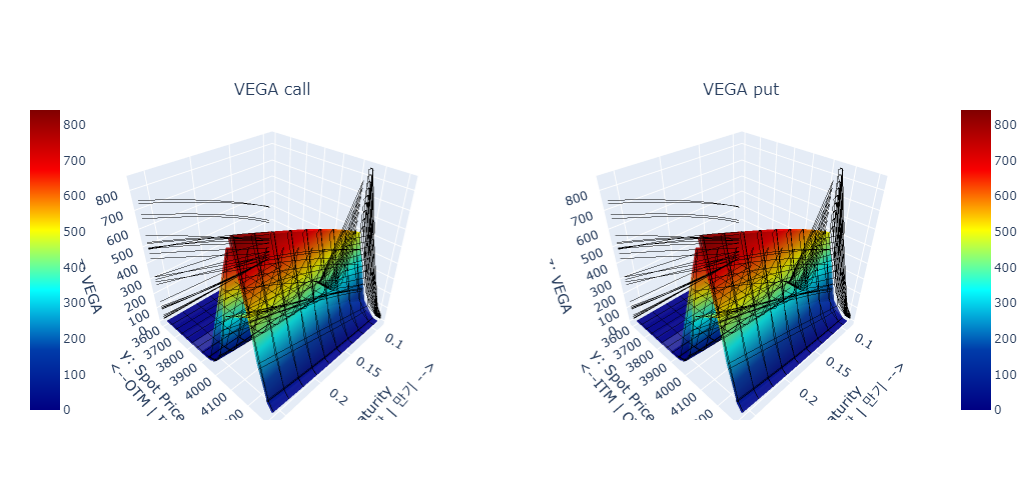

In [27]:
my_3d(call=call_vega, put=put_vega, LABEL = "VEGA" )

# 로(Rho) : 이자율에 대한 민감도
* <font color=red> 시장에서 이자율이 한 단위 변했을 때 옵션의 가치가 얼마만큼 변하는가를 나타내는 지표 </font>
* 블랙숄즈 변수 : 기초자산, 시간
* 실제시장 변수 : 기초자산, 시간 + 이자율, 변동성 

In [61]:
def rho(option_type, S, K, r, T, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * (sigma ** 2)) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == "call":
        return  1 * K * T * np.exp(-r * T) * stat.norm.cdf(1 * d2)
    else:
        return -1  * K * T * np.exp(-r * T) * stat.norm.cdf(-1  * d2)

call_rho = rho("call", S, K, r, T, sigma)    # calculate call option rho
put_rho  = rho("put" , S, K, r, T, sigma)    # calculate put option rho

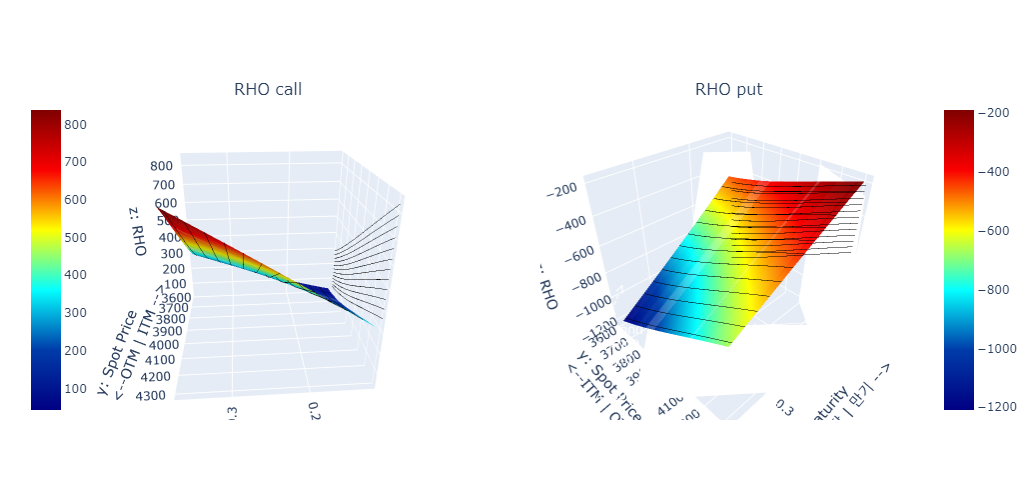

In [62]:
my_3d(call=call_rho, put=put_rho, LABEL = "RHO" )

<pre>
* 내가격 상태 : 가장 큰 값을 갖는다
* 외가격 상태 : 만기에 상관없이 0 값에 근사한다(영향력이 없다)
* 만기가 길게 남아있을때 영향력이 크다 --> 만기에 가까울수록  값이 작아진다

<font color=red>만기가 길고 내가격일때 가장 영향이 크다
영향력 : 콜옵션 (+) --> 이자율이 증가하면 옵션가치 증가로 이득
        풋옵션 (-)  --> 이자율이 증가하면 손해
</font>
